In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

Format of the file: age_gender_ethnicity_datetime 

In [2]:
path = "/kaggle/input/utkface-new/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
26_0_2_20170104023102422.jpg.chip.jpg


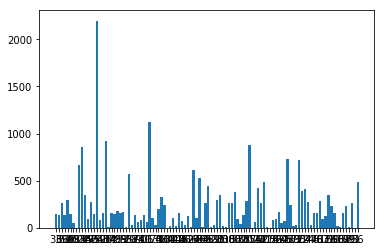

Max value: 99


In [4]:
import matplotlib.pyplot as plt
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(ages))

Gender: 0 Age: 54


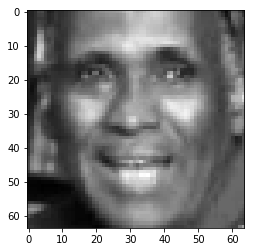

In [5]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 500
sample = images[idx]

display(sample)

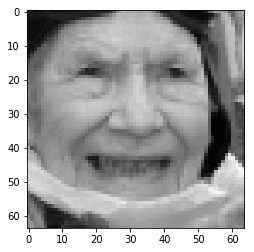

In [7]:
# pre processing
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 4
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [9]:
print("Shape of image:",sample.shape)

Shape of image: (64, 64, 1)


In [10]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

Using TensorFlow backend.


In [11]:
#Create your own model here

In [12]:

model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [13]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 60, 60, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 30, 30, 64)   0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [14]:
h = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data,epochs = 25)
#preferred validation_data

Train on 18966 samples, validate on 4742 samples
Epoch 1/25
18966/18966 [==============================] - 9s 450us/step - loss: 0.9076 - dense_4_loss: 0.2125 - dense_10_loss: 0.6940 - dense_4_accuracy: 0.0110 - dense_10_accuracy: 0.5149 - val_loss: 0.7648 - val_dense_4_loss: 0.0741 - val_dense_10_loss: 0.6901 - val_dense_4_accuracy: 0.0000e+00 - val_dense_10_accuracy: 0.5158
Epoch 2/25
18966/18966 [==============================] - 5s 255us/step - loss: 0.7032 - dense_4_loss: 0.0624 - dense_10_loss: 0.6405 - dense_4_accuracy: 0.0175 - dense_10_accuracy: 0.6346 - val_loss: 0.6181 - val_dense_4_loss: 0.0403 - val_dense_10_loss: 0.5794 - val_dense_4_accuracy: 0.0238 - val_dense_10_accuracy: 0.7845
Epoch 3/25
18966/18966 [==============================] - 5s 255us/step - loss: 0.6152 - dense_4_loss: 0.0509 - dense_10_loss: 0.5642 - dense_4_accuracy: 0.0206 - dense_10_accuracy: 0.7632 - val_loss: 0.5169 - val_dense_4_loss: 0.0283 - val_dense_10_loss: 0.4907 - val_dense_4_accuracy: 0.0247 -

In [15]:
model.save('data.h5')

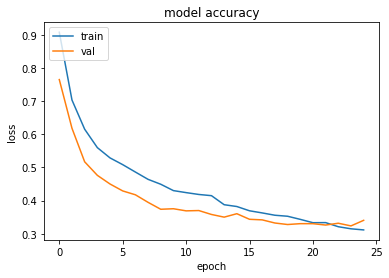

In [16]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

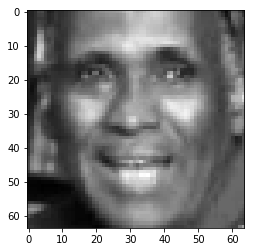

Actual Gender: Male Age: 54
Values: [array([[0.6873359]], dtype=float32), array([[0.49590588]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 31-80


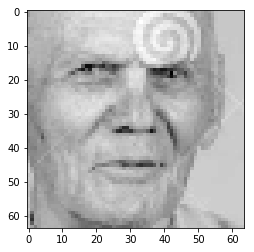

Actual Gender: Male Age: 82
Values: [array([[0.7367866]], dtype=float32), array([[0.00668915]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 31-80


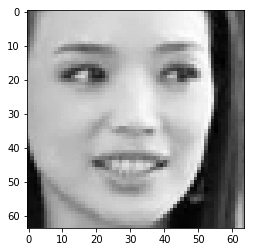

Actual Gender: Female Age: 24
Values: [array([[0.4974701]], dtype=float32), array([[0.839899]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30


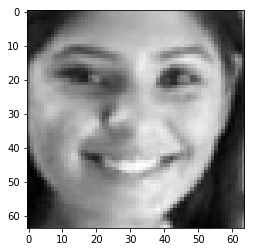

Actual Gender: Female Age: 21
Values: [array([[0.40249586]], dtype=float32), array([[0.839899]], dtype=float32)] 
Predicted Gender: Female Predicted Age: Unknown


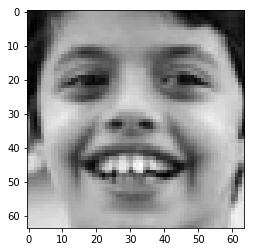

Actual Gender: Male Age: 7
Values: [array([[0.34735206]], dtype=float32), array([[0.5565662]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 0-18


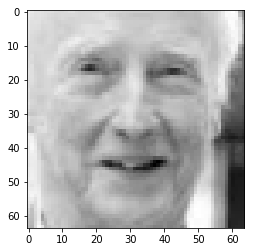

Actual Gender: Male Age: 76
Values: [array([[0.72203565]], dtype=float32), array([[0.07318716]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 31-80


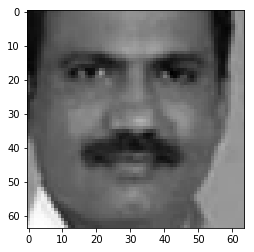

Actual Gender: Male Age: 34
Values: [array([[0.7111477]], dtype=float32), array([[0.]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 31-80


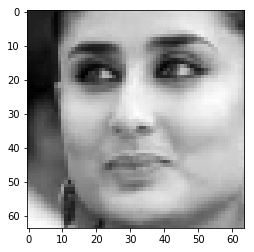

Actual Gender: Female Age: 25
Values: [array([[0.5404887]], dtype=float32), array([[0.839899]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30


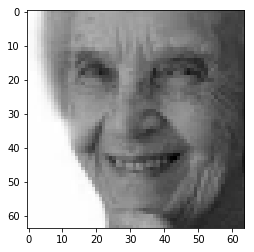

Actual Gender: Female Age: 79
Values: [array([[0.71430355]], dtype=float32), array([[0.839899]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 31-80


In [17]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
#Create functions for the fectching of details
    
    
indexes = [500,59,80,2,4546,7,9,256,45]
for idx in indexes:
    sample = images[idx]
    display(sample)
    